2025-06-11 19:09:44,321 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.6e+01/s


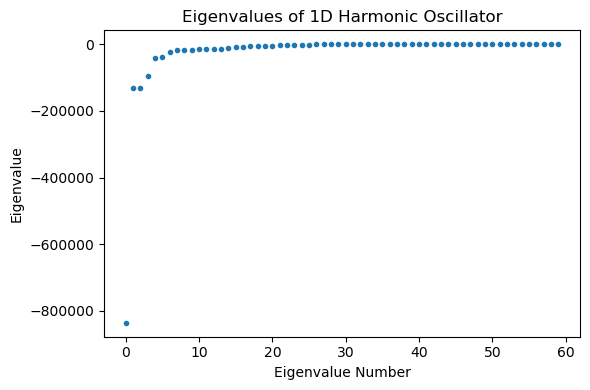

In [6]:
import dedalus.public as d3
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

'''
Code solving the 2D Laplacian equation:
    ∇²u = λu
with boundaries at x ∈ [0,1] and y ∈ [0,1], with homogeneous Dirichlet boundary conditions
and then plotting the first 10 eigenvalues calculated.
'''

#Bases
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=np.float64)
xbasis = d3.RealFourier(coords['x'], 64, bounds=(0,1), dealias=3/2)
ybasis = d3.Chebyshev(coords['y'], 64, bounds=(0,1), dealias=3/2)

#Fields
u = dist.Field(name='u', bases=(xbasis, ybasis))
lam = dist.Field(name='lam')
tau1 = dist.Field(name='tau1')
tau2 = dist.Field(name='tau2')


#Subs
x = dist.local_grid(xbasis)
y = dist.local_grid(ybasis)
lift_basis = ybasis.derivative_basis(1) 
lift = lambda A: d3.Lift(A, lift_basis, -1)

#Problem
problem = d3.EVP([u, tau1, tau2], eigenvalue=lam, namespace=locals())

problem.add_equation("lap(u) - lam*u + lift(tau1) + lift(tau2) = 0")
problem.add_equation("u(y = 0) = 0")
problem.add_equation("u(y = 1) = 0")

#Solver
solver = problem.build_solver()
solver.solve_dense(solver.subproblems[0])
sol = np.sort(solver.eigenvalues)
n = np.arange(sol.size)

#Plot
plt.figure(figsize=(6,4))
plt.plot(n[0:60], sol[0:60], '.')
plt.xlabel('Eigenvalue Number')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of 2D Laplacian')
plt.tight_layout()